#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [204]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve, validation_curve

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_columns', None)

#**Ejercicio-1.** 

In [41]:
data_description = pd.read_csv(r'C:\Users\alexe\OneDrive\Maestría en Inteligencia Artificial\Inteligencia Artificial\Actividad en equipo\data\south-german-credit-prediction\DataDescription.csv')
data_description

,Column Name,Variable Name,Content
0,laufkont,status,status of the debtor's checking account with t...
1,laufzeit,duration,credit duration in months (quantitative)
2,moral,credit_history,history of compliance with previous or concurr...
3,verw,purpose,purpose for which the credit is needed (catego...
4,hoehe,amount,credit amount in DM (quantitative; result of m...
5,sparkont,savings,debtor's savings (categorical)
6,beszeit,employment_duration,duration of debtor's employment with current e...
7,rate,installment_rate,credit installments as a percentage of debtor'...
8,famges,personal_status_sex,combined information on sex and marital status...
9,buerge,other_debtors,Is there another debtor or a guarantor for the...


In [42]:
path = r'C:\Users\alexe\OneDrive\Maestría en Inteligencia Artificial\Inteligencia Artificial\Actividad en equipo\data\south-german-credit-prediction\SouthGermanCredit.asc'
data_cred = pd.read_csv(path, delimiter=' ')

In [43]:
data_description.set_index('Column Name')

,Variable Name,Content
Column Name,,
laufkont,status,status of the debtor's checking account with t...
laufzeit,duration,credit duration in months (quantitative)
moral,credit_history,history of compliance with previous or concurr...
verw,purpose,purpose for which the credit is needed (catego...
hoehe,amount,credit amount in DM (quantitative; result of m...
sparkont,savings,debtor's savings (categorical)
beszeit,employment_duration,duration of debtor's employment with current e...
rate,installment_rate,credit installments as a percentage of debtor'...
famges,personal_status_sex,combined information on sex and marital status...


In [44]:
dict_nombres = data_description.set_index('Column Name').iloc[:,0].to_dict()

In [45]:
data_cred.rename(columns=dict_nombres, inplace= True)
data_cred.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


#**Ejercicio-2.**

In [46]:
X = data_cred.drop('credit_risk', axis=1)
y = data_cred['credit_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.85, random_state= 42)

#**Ejercicio-3.**

In [47]:
data_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

$`laufkont = status`
                                               
 1 : no checking account                       
 2 : ... < 0 DM                                
 3 : 0<= ... < 200 DM                          
 4 : ... >= 200 DM / salary for at least 1 year

 

$`laufzeit = duration`
     

 

$`moral = credit_history`
                                                
 0 : delay in paying off in the past            
 1 : critical account/other credits elsewhere   
 2 : no credits taken/all credits paid back duly
 3 : existing credits paid back duly till now   
 4 : all credits at this bank paid back duly    

 

$`verw = purpose`
                        
 0 : others             
 1 : car (new)          
 2 : car (used)         
 3 : furniture/equipment
 4 : radio/television   
 5 : domestic appliances
 6 : repairs            
 7 : education          
 8 : vacation           
 9 : retraining         
 10 : business          

 

$`hoehe = amount`
     

 

$`sparkont = savings`
                               
 1 : unknown/no savings account
 2 : ... <  100 DM             
 3 : 100 <= ... <  500 DM      
 4 : 500 <= ... < 1000 DM      
 5 : ... >= 1000 DM            

 

$`beszeit = employment_duration`
                     
 1 : unemployed      
 2 : < 1 yr          
 3 : 1 <= ... < 4 yrs
 4 : 4 <= ... < 7 yrs
 5 : >= 7 yrs        

 

$`rate = installment_rate`
                   
 1 : >= 35         
 2 : 25 <= ... < 35
 3 : 20 <= ... < 25
 4 : < 20          

 

$`famges = personal_status_sex`
                                         
 1 : male : divorced/separated           
 2 : female : non-single or male : single
 3 : male : married/widowed              
 4 : female : single                     

 

$`buerge = other_debtors`
                 
 1 : none        
 2 : co-applicant
 3 : guarantor   

 

$`wohnzeit = present_residence`
                     
 1 : < 1 yr          
 2 : 1 <= ... < 4 yrs
 3 : 4 <= ... < 7 yrs
 4 : >= 7 yrs        

 

$`verm = property`
                                              
 1 : unknown / no property                    
 2 : car or other                             
 3 : building soc. savings agr./life insurance
 4 : real estate                              

 

$`alter = age`
     

 

$`weitkred = other_installment_plans`
           
 1 : bank  
 2 : stores
 3 : none  

 

$`wohn = housing`
             
 1 : for free
 2 : rent    
 3 : own     

 

$`bishkred = number_credits`
         
 1 : 1   
 2 : 2-3 
 3 : 4-5 
 4 : >= 6

 

$`beruf = job`
                                               
 1 : unemployed/unskilled - non-resident       
 2 : unskilled - resident                      
 3 : skilled employee/official                 
 4 : manager/self-empl./highly qualif. employee

 

$`pers = people_liable`
              
 1 : 3 or more
 2 : 0 to 2   

 

$`telef = telephone`
                              
 1 : no                       
 2 : yes (under customer name)

 

$`gastarb = foreign_worker`
        
 1 : yes
 2 : no 

 

$`kredit = credit_risk`
         
 0 : bad 
 1 : good

In [48]:
data_cred.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

array([[<AxesSubplot: title={'center': 'status'}>,
        <AxesSubplot: title={'center': 'duration'}>,
        <AxesSubplot: title={'center': 'credit_history'}>,
        <AxesSubplot: title={'center': 'purpose'}>,
        <AxesSubplot: title={'center': 'amount'}>],
       [<AxesSubplot: title={'center': 'savings'}>,
        <AxesSubplot: title={'center': 'employment_duration'}>,
        <AxesSubplot: title={'center': 'installment_rate'}>,
        <AxesSubplot: title={'center': 'personal_status_sex'}>,
        <AxesSubplot: title={'center': 'other_debtors'}>],
       [<AxesSubplot: title={'center': 'present_residence'}>,
        <AxesSubplot: title={'center': 'property'}>,
        <AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'other_installment_plans'}>,
        <AxesSubplot: title={'center': 'housing'}>],
       [<AxesSubplot: title={'center': 'number_credits'}>,
        <AxesSubplot: title={'center': 'job'}>,
        <AxesSubplot: title={'center': 'pe

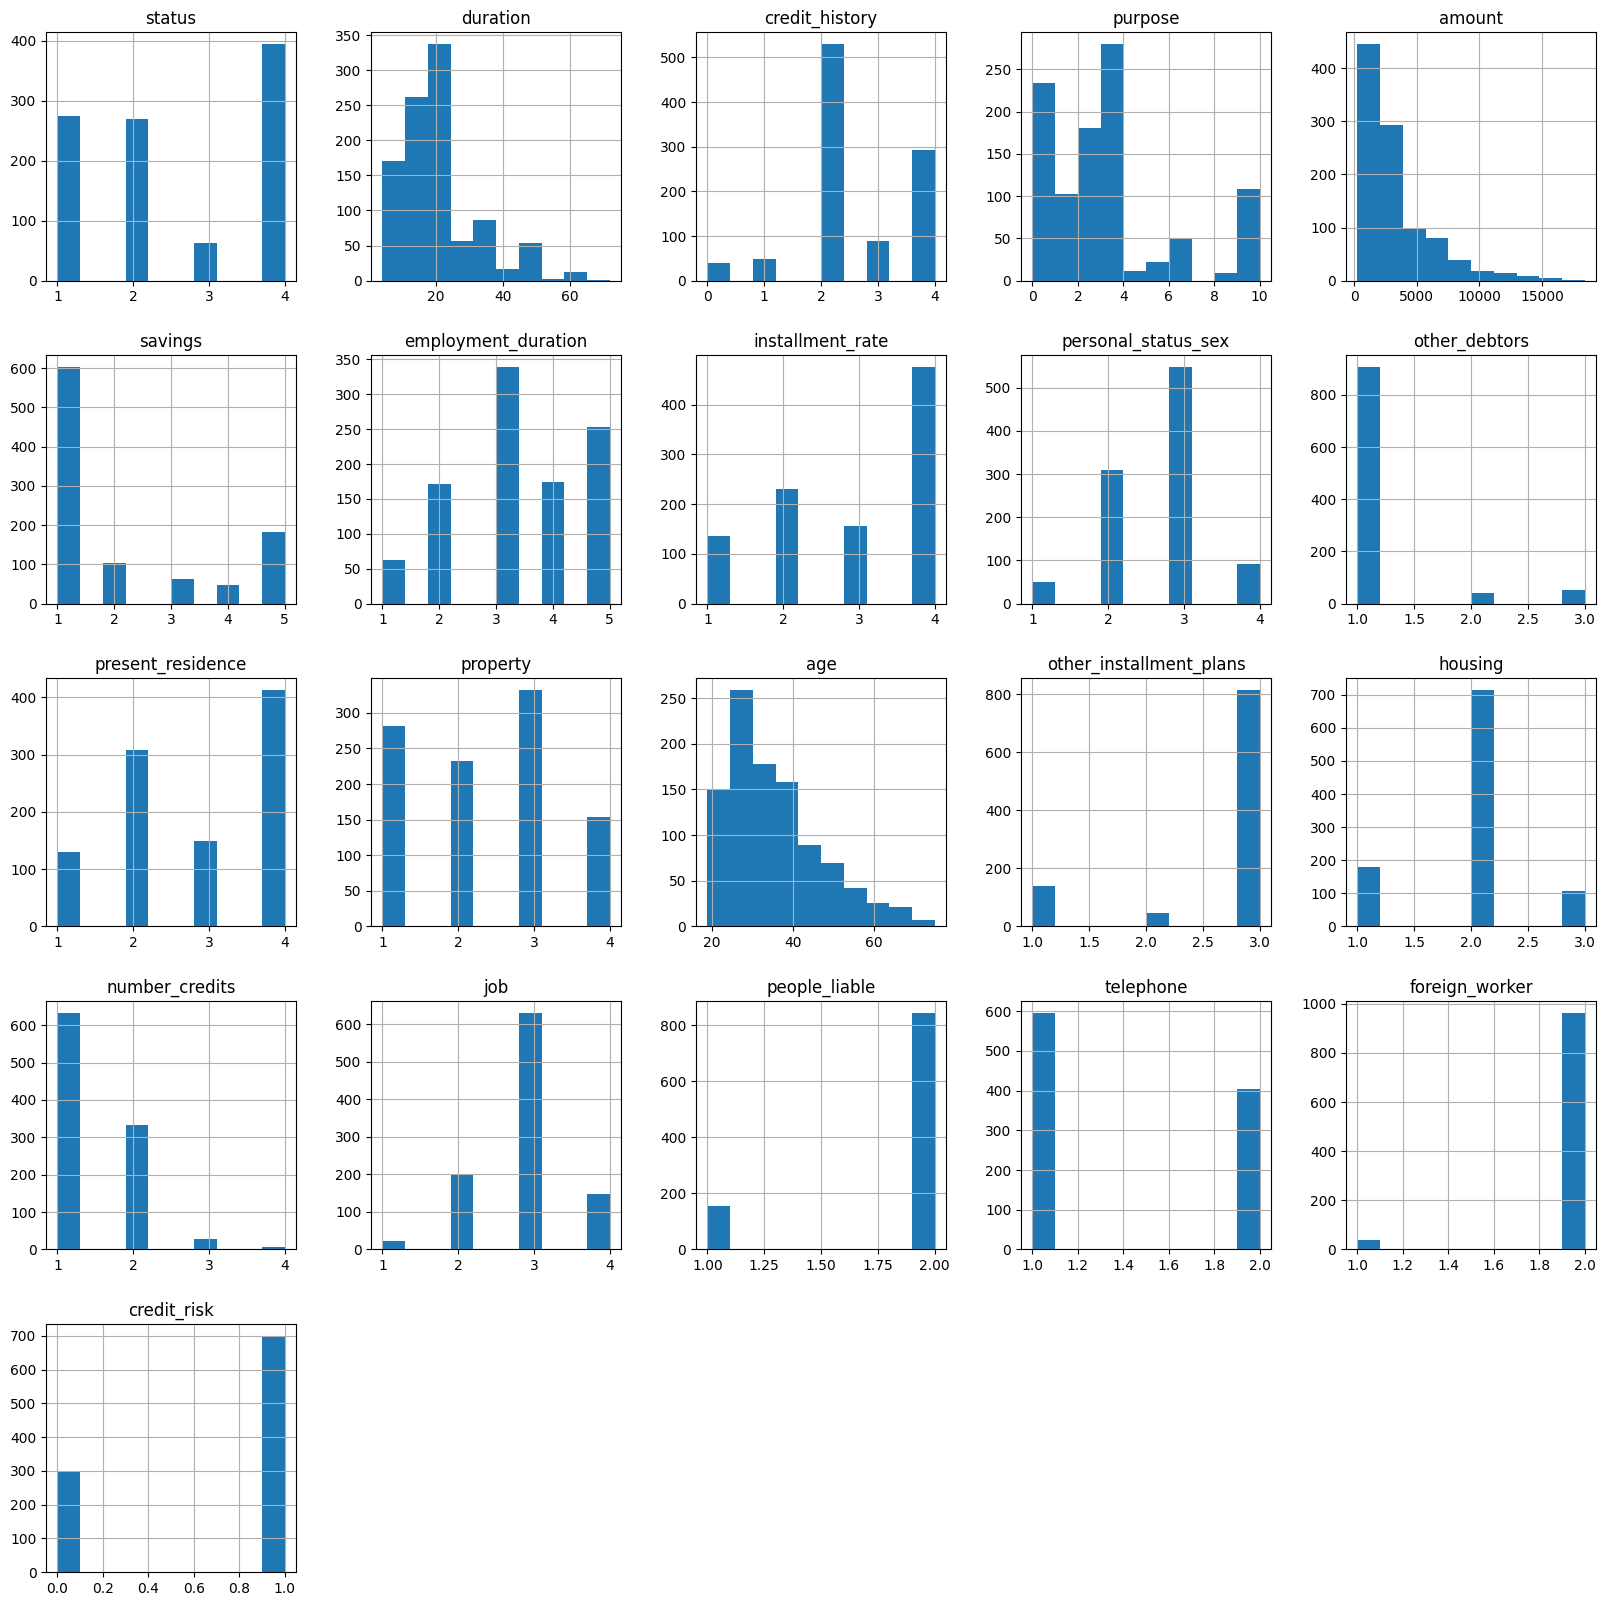

In [49]:
data_cred.hist(figsize= (20, 20))

In [50]:
data_cred.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


Para el preprocesamiento de la información. Al ver que las variables continuas tienen la media cercana a la mediana entonces es mejor usar una estandarización a normal.

Sobre las variables categoricas binarias al saber que solo que dos opciones, el OneHotEncoder no nos sirve crearle una columna extra sino más bien sabíendo que es binaria eliminamos una columna y nos quedamos con la sobrante, de esa forma si es que en esa categoria fue un $0$ entonces por default entonces sabremos que su valor en la otra categoria es $1$.

In [164]:
# Imputaciones]
#   Primero vamos a hacer la función de imputaciones para las variables categorias:
from sklearn.preprocessing import OneHotEncoder


cat_pipe = Pipeline(steps= [('impt_cat', SimpleImputer(strategy= 'most_frequent', missing_values= np.nan))])
col_cat = ['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property',
            'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']

#   Para las variables continuas
cont_pipe = Pipeline(steps=[('cont_cat', SimpleImputer(strategy= 'median', missing_values= np.nan)),
                            ('escalaNormal', StandardScaler())
                            ])
col_cont = ['duration', 'amount', 'age']

transform_columns = ColumnTransformer(transformers=[
                                        ('var_car', cat_pipe, col_cat),
                                        ('var_cont', cont_pipe, col_cont)])


#**Ejercicio-4.**

In [52]:
modelos = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]
nombres = ['Regresión Logística', 'Árbol de Decisión', 'Bosque Aleatorio']

In [53]:
def mi_accuracy(y_real, y_pred):
    cm = np.array(confusion_matrix(y_real, y_pred))
    return (cm[0,0] + cm[1,1]) / cm.sum()

def mi_precision(y_real, y_pred):
    cm = np.array(confusion_matrix(y_real, y_pred))
    return cm[1,1] / cm[:,1].sum()

def mi_recall(y_real, y_pred):
    cm = np.array(confusion_matrix(y_real, y_pred))
    return cm[1,1] / cm[1,:].sum()

def mi_f1_score(y_real, y_pred):
    cm = np.array(confusion_matrix(y_real, y_pred))
    return 2*(cm[1,1]) / (2*cm[1,1] + cm[0,1] + cm[1,0])

def mi_g_mean(y_real, y_pred):
    cm = np.array(confusion_matrix(y_real, y_pred))
    return np.sqrt(mi_f1_score(y_real, y_pred) * (cm[0,0] / (cm[0,:].sum())))

mis_metricas = {'accuracy': make_scorer(mi_accuracy), 'precision': make_scorer(mi_precision),'recall': make_scorer(mi_recall), 'f1': make_scorer(mi_f1_score), 'gmean': make_scorer(mi_g_mean)}

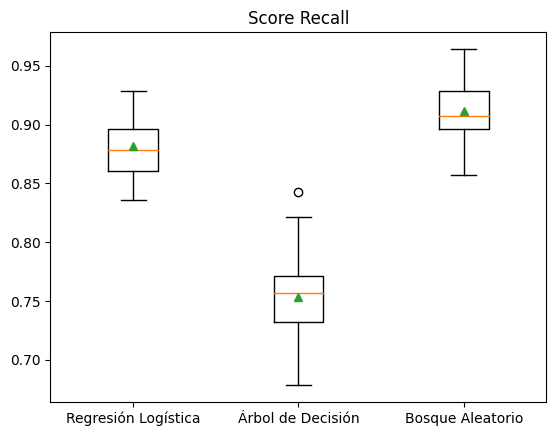

In [113]:
resultados = []
recall_list = []
res = []
for i in range(len(modelos)):
    pipe = Pipeline(steps=[('variables', transform_columns),
                            ('modelo', modelos[i])])
    cv = RepeatedStratifiedKFold(n_splits= 5, n_repeats= 3, random_state= 42)
    resultados_modelo = cross_validate(pipe, X, y, cv= cv, n_jobs=-1, scoring= mis_metricas)

    resultados.append(resultados_modelo)
    recall_list.append(resultados_modelo['test_recall'])
    res.append([np.mean(x) for x in resultados_modelo.values()])


plt.boxplot(recall_list, labels=nombres, showmeans=True)
plt.title('Score Recall')
plt.show()


    

El modelo que está subentrenadao es el árbol de decisión el cual con los hiperparámetros de default no logra ajustar bien a la información, el que está sobreentrenado es el bosque aleatorio que tiene un muy alto score lo que disminuiría su varianza.

In [125]:
metricas = pd.DataFrame(index= resultados[0].keys(), data= dict(zip(nombres, res)))
metricas

,Regresión Logística,Árbol de Decisión,Bosque Aleatorio
fit_time,0.066484,0.050270,0.596458
score_time,0.016292,0.017289,0.024409
test_accuracy,0.759333,0.666000,0.747333
test_precision,0.797229,0.765807,0.770229
test_recall,0.881429,0.753333,0.911429
test_f1,0.836773,0.758968,0.834567
test_gmean,0.628181,0.591224,0.549494


## Curvas de aprendizaje

In [177]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, nombre):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title(f'Curvas de Aprendizaje de {nombre}')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [178]:
def get_learning_curve(modelo, nombre, metrica, X_train):
    pipe = Pipeline([('columns', transform_columns),
                    ('modelos', modelo)])
    mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
           
    delta_train_sz = np.linspace(0.1, 1.0, num=20)

    tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipe,    
                                                    X = X_train,
                                                    y = y_train,
                                                    cv = mi_kfold,
                                                    scoring = metrica,
                                                    train_sizes =  delta_train_sz,
                                                    random_state=42)
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, nombre)



Regresión Logistica

c:\Users\alexe\OneDrive\Documentos\Entornos virtuales\mna_env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\alexe\OneDrive\Documentos\Entornos virtuales\mna_env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

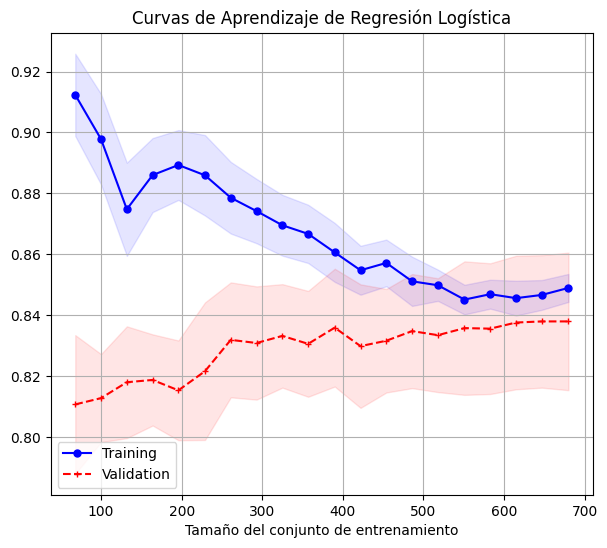

In [179]:
get_learning_curve(modelo= modelos[0], nombre=nombres[0], metrica=make_scorer(mi_f1_score), X_train =X_train)

Árbol aleatorio

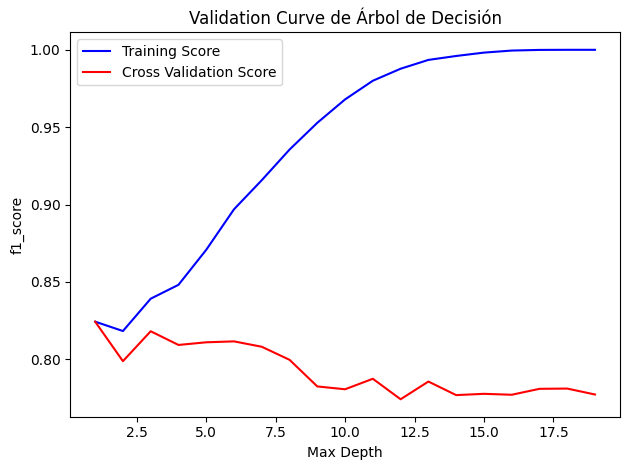

In [203]:
Xtt  = transform_columns.fit_transform(X_train)

mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
        
parameter_range = np.arange(1, 20,1)

train_score, test_score = validation_curve(estimator = DecisionTreeClassifier(),
                                                X = Xtt,
                                                y = y_train,
                                                cv = mi_kfold,
                                                param_name= 'max_depth',
                                                param_range= parameter_range,
                                                scoring = make_scorer(mi_f1_score))

mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'r')
 
# Creating the plot
plt.title(f"Validation Curve de {nombres[1]}")
plt.xlabel("Max Depth")
plt.ylabel("f1_score")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

Bosque Aleatorio

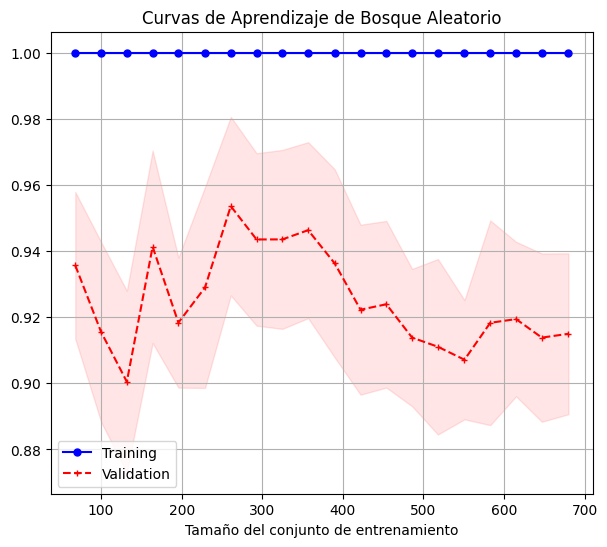

In [180]:
get_learning_curve(modelo= modelos[2], nombre=nombres[2], metrica=make_scorer(mi_recall), X_train =X_train)

#**Ejercicio-5.**

Regresión Logística

In [207]:
pipelr = Pipeline(steps=[('trans_col', transform_columns), ('modelo', LogisticRegression(max_iter=10000))])

parms_lr = {'modelo__C':np.linspace(0.5,1,5),
            'modelo__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'modelo__class_weight':['balanced', None],
            'modelo__penalty':['l1', 'l2', 'elasticnet', 'none']}

mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

lr_grid = GridSearchCV(estimator= pipelr, 
                        param_grid= parms_lr,
                        scoring= make_scorer(mi_f1_score),
                        cv= mi_kfold,
                        n_jobs= -1)

lr_grid.fit(X_train, y_train)
print(f'El mejor score fue: {lr_grid.best_score_}')
print(f'Los mejores parametros fueron: {lr_grid.best_params_}')
lr_mejor_modelo = lr_grid.best_estimator_

El mejor score fue: 0.8396143718849712
Los mejores parametros fueron: {'modelo__C': 0.5, 'modelo__class_weight': None, 'modelo__penalty': 'l1', 'modelo__solver': 'liblinear'}


c:\Users\alexe\OneDrive\Documentos\Entornos virtuales\mna_env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1350 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alexe\OneDrive\Documentos\Entornos virtuales\mna_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alexe\OneDrive\Documentos\Entornos virtuales\mna_env\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\alexe\OneDrive\Documentos\

#**Ejercicio-6.**

In [56]:
None

###**Fin de la Actividad de la semana 6.**